In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.datasets import get_rdataset
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

In [2]:
air_passenger = get_rdataset("AirPassengers").data["value"]

In [32]:
get_rdataset("AirPassengers").data.iloc[:27]

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135
6,1949.500000,148
7,1949.583333,148
8,1949.666667,136
9,1949.750000,119


In [3]:
air_passenger

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: value, Length: 144, dtype: int64

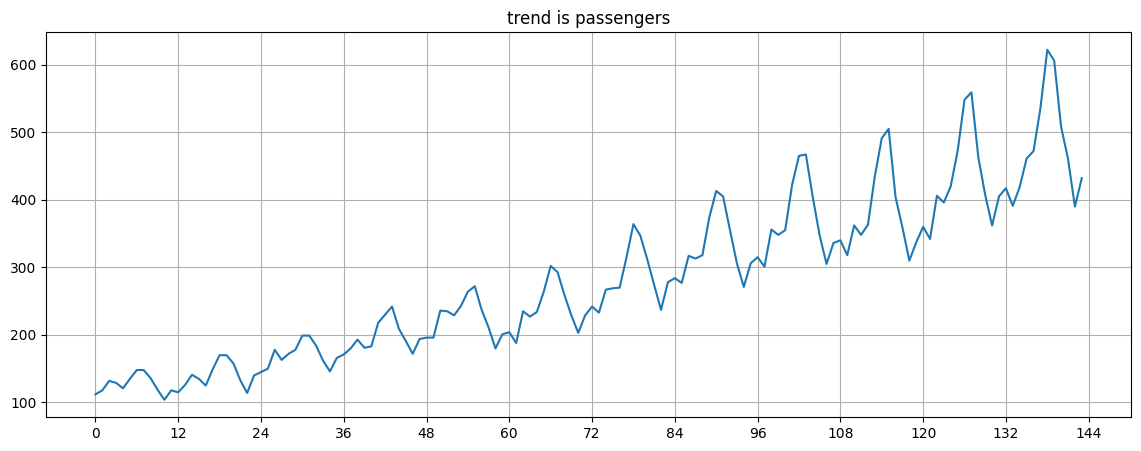

In [4]:
plt.figure(figsize=(14,5))
plt.plot(air_passenger)
plt.xticks(range(0,145,12))
plt.title("trend is passengers")
plt.grid()
plt.show()

In [5]:
model = ARIMA(air_passenger,order=(5,3,4))

In [6]:
# order = (P,D,Q)

In [7]:
output = model.fit()

In [8]:
forecast = output.get_forecast(steps = 12)

In [9]:
# steps = 12 means it gives next 12 days forecaseting 

In [10]:
forecast.predicted_mean

144    466.346374
145    446.614457
146    402.265596
147    344.949531
148    316.335023
149    335.853243
150    362.896600
151    353.057163
152    302.233451
153    243.402272
154    218.642058
155    235.680896
Name: predicted_mean, dtype: float64

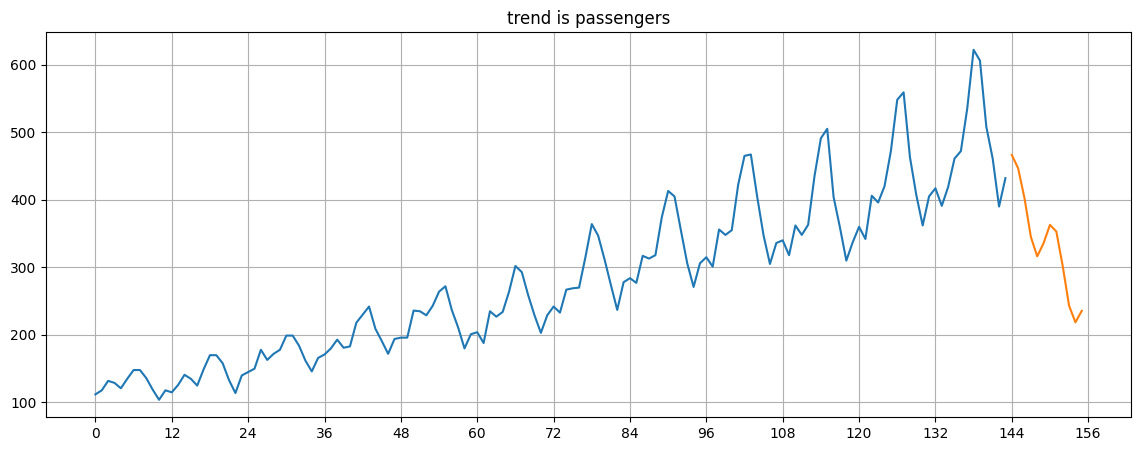

In [11]:
plt.figure(figsize=(14,5))
plt.plot(air_passenger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0,157,12))
plt.title("trend is passengers")
plt.grid()
plt.show()

In [12]:
error = output.aic

In [13]:
# aic shows the training error
# training error shows how good out model is get train on training data 
# error is less means our model trained well and it its high means out model is not trained well 
# aic is just like score to find predicted error (we can say predicted accuracy)

In [14]:
error

np.float64(1391.953588916123)

In [15]:
best_order = None
min_aic = np.inf
# inf = infinity

In [16]:
# tunning of ARIMA model
# here we are finding best values of (P,D,Q)

for p in range(8,13):
    for d in range(1,4):
        for q in range(5,10):
            m= ARIMA(air_passenger,order=(p,d,q))
            res = m.fit()

            if res.aic < min_aic:
                min_aic = res.aic
                best_order = (p,d,q)

# it will build 75 models and gives best model to us

In [17]:
best_order 

(11, 2, 7)

In [18]:
min_aic

np.float64(1140.068743325428)

In [19]:
model = ARIMA(air_passenger,order=best_order)

In [20]:
result = model.fit()

In [21]:
forecast = result.get_forecast(steps = 12)

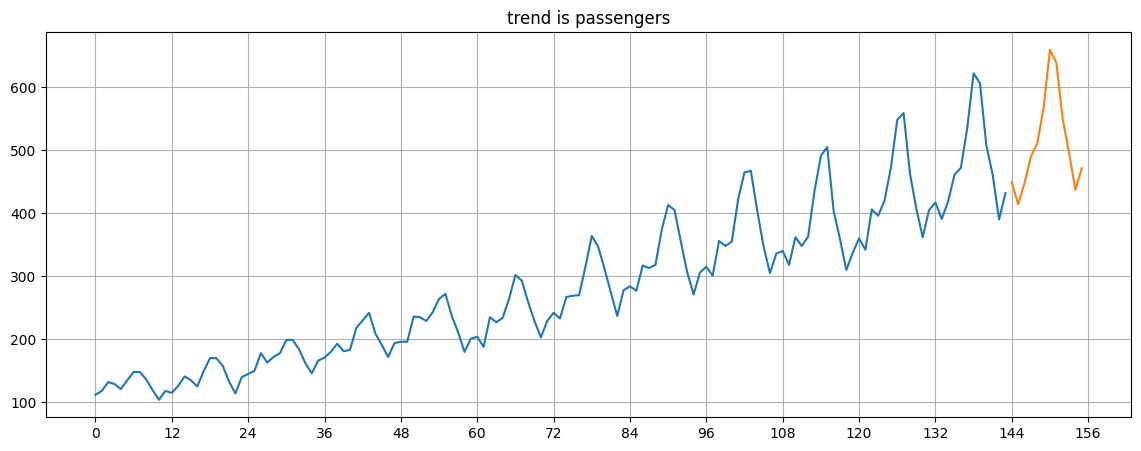

In [22]:
plt.figure(figsize=(14,5))
plt.plot(air_passenger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0,157,12))
plt.title("trend is passengers")
plt.grid()
plt.show()

In [23]:
forecast = result.get_forecast(steps = 24 )

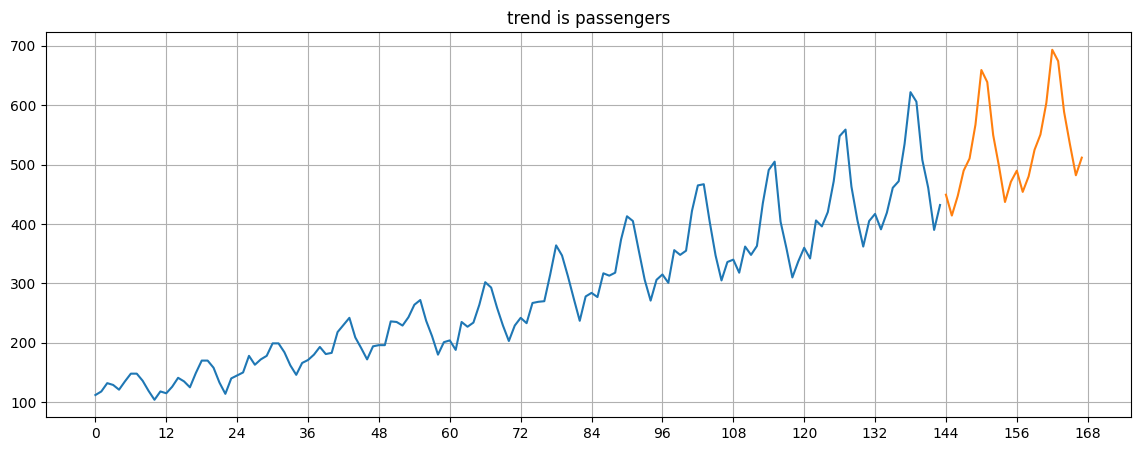

In [24]:
plt.figure(figsize=(14,5))
plt.plot(air_passenger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0,169,12))
plt.title("trend is passengers")
plt.grid()
plt.show()

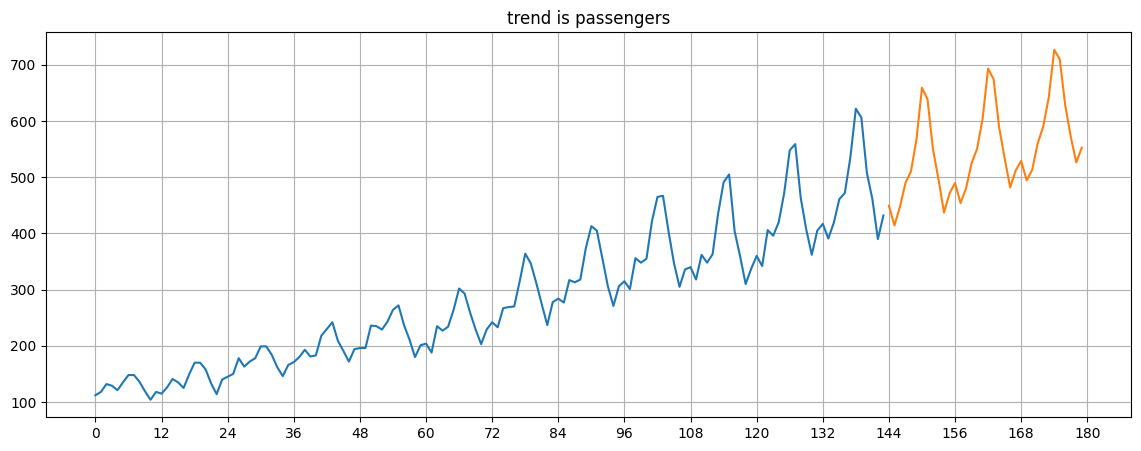

In [25]:
forecast = result.get_forecast(steps = 36)

plt.figure(figsize=(14,5))
plt.plot(air_passenger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0,181,12))
plt.title("trend is passengers")
plt.grid()
plt.show()

In [26]:
forecast.predicted_mean

144    449.341728
145    414.257642
146    447.238744
147    489.852292
148    510.296080
149    567.306423
150    659.303224
151    638.905535
152    549.686503
153    496.328914
154    437.055844
155    471.165989
156    489.815465
157    454.086982
158    480.209866
159    524.847890
160    550.601288
161    603.957388
162    693.396858
163    674.320589
164    589.043873
165    533.899495
166    482.082140
167    511.733739
168    529.171011
169    494.398344
170    513.237133
171    560.393404
172    590.163172
173    641.399623
174    726.860613
175    710.069715
176    627.926477
177    572.120214
178    526.433595
179    552.559359
Name: predicted_mean, dtype: float64